# 作業

練習以旋轉變換 + 平移變換來實現仿射變換
> 旋轉 45 度 + 縮放 0.5 倍 + 平移 (x+100, y-50)

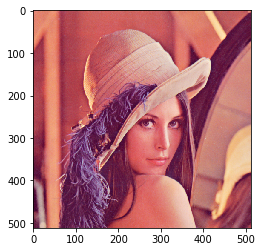

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
IMG_PATH = "Part01/lena.png"

img = cv2.imread(IMG_PATH,cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Affine Transformation - Case 2: any three point

img.shape=(512, 512)
M_affine=[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]


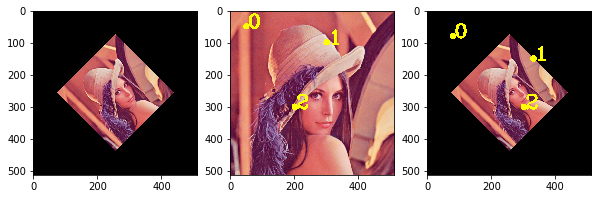

In [27]:
# 給定兩兩一對，共三對的點
# 這邊我們先用手動設定三對點，一般情況下會有點的資料或是透過介面手動標記三個點
rows, cols = img.shape[:2]
print("img.shape={}".format(img.shape[0:2]))
pt1 = np.array([[50,50], [300,100], [200,300]], dtype=np.float32)
pt2 = np.array([[80,80], [330,150], [300,300]], dtype=np.float32)

# 取得 affine 矩陣並做 affine 操作
#cv2.getRotationMatrix2D(中⼼心位置, 旋轉⾓角度, 縮放倍率)
M_affine = cv2.getRotationMatrix2D((cols//2,rows//2), 45, 0.5)
print("M_affine={}".format(M_affine))
img_affine = cv2.warpAffine(img, M_affine, img.shape[0:2])

fig,ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(cv2.cvtColor(img_affine, cv2.COLOR_BGR2RGB))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(pt1):
    pts = tuple(map(int, pts))
    # cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度)
    cv2.circle(img_copy, pts, 10, (0, 255, 255), -1)
    # cv2.putText(影像, 文字, 座標, 字型, 大小, 顏色, 線條寬度, 線條種類)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 255),5)

ax[1].imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    
for idx, pts in enumerate(pt2):
    pts = tuple(map(int, pts))
    cv2.circle(img_affine, pts, 10, (0, 255, 255), -1)
    cv2.putText(img_affine, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 255), 5)


ax[2].imshow(cv2.cvtColor(img_affine, cv2.COLOR_BGR2RGB))    
    